IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.read_csv(r'C:\Users\utkso\OneDrive\Desktop\Utk\Projects\Utkarsh Som CDKeys CRM Analyst\data\Cleaned.csv')

EXPLORING THE DATA


In [4]:
df.head()

,Customer,Purchase Date,Product,Price/Qty,Price,Quantity,Status,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,82672,19/05/2024 3:49,Ghost of Tsushima DIRECTOR'S CUT PC,197644.09,197644.09,1,complete,NaN,NaN,NaN,NaN
1,82672,28/07/2024 22:10,ARMORED CORE VI FIRES OF RUBICON PC,131561.69,131561.69,1,complete,NaN,NaN,NaN,NaN
2,73874,19/12/2024 8:33,"Warhammer 40,000: Space Marine 2 PC",59679.00,59679.00,1,complete,NaN,NaN,NaN,NaN
3,73846,19/12/2024 4:05,"Warhammer 40,000: Space Marine 2 PC",59679.00,59679.00,1,complete,NaN,NaN,NaN,NaN
4,73818,19/12/2024 3:28,"Warhammer 40,000: Space Marine 2 PC",59679.00,59679.00,1,complete,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,Customer,Purchase Date,Product,Price/Qty,Price,Quantity,Status,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
14240,89156,7/12/2024 7:25,Snowtopia: Ski Resort Tycoon PC,0.59,0.59,1,complete,NaN,NaN,NaN,NaN
14241,46857,15/04/2024 7:43,Sins of a Solar Empire Trinity PC,6.19,6.19,1,canceled,NaN,NaN,NaN,NaN
14242,46857,15/04/2024 7:42,Sins of a Solar Empire Trinity PC,6.19,6.19,1,canceled,NaN,NaN,NaN,NaN
14243,46857,15/04/2024 7:37,Sins of a Solar Empire Trinity PC,6.19,6.19,1,canceled,NaN,NaN,NaN,NaN
14244,90292,18/09/2024 11:54,All You Can Eat PC,0.39,0.39,1,complete,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

Customer           int64
Purchase Date     object
Product           object
Price/Qty        float64
Price            float64
Quantity           int64
Status            object
Unnamed: 7       float64
Unnamed: 8       float64
Unnamed: 9       float64
Unnamed: 10      float64
dtype: object

FILTERING OUT ONLY COMPLETE TRANSACTIONS

In [7]:
df = df[df['Status'] == 'complete']

REMOVING DUPLICATES

In [8]:
df.duplicated().sum()
df = df.drop_duplicates()
df[df.duplicated(subset=['Customer', 'Purchase Date', 'Product', 'Status'], keep=False)]


,Customer,Purchase Date,Product,Price/Qty,Price,Quantity,Status,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10


HANDLING OUTLIERS

In [9]:
median_prices = df.groupby(['Product', 'Quantity'])['Price'].transform('median')

df.loc[df['Price'] > 2 * median_prices, 'Price'] = median_prices  
df.loc[df['Price'] < 0.5 * median_prices, 'Price'] = median_prices  

In [10]:
affected_customers = df[df['Price'] != median_prices]['Customer'].unique()
print(affected_customers)

[ 9204 87654  4935 ...  2449 97331 63797]


In [11]:

df['Price_per_Unit'] = df['Price'] / df['Quantity']

single_occurrence_products = df['Product'].value_counts()[df['Product'].value_counts() == 1].index

df[df['Product'].isin(single_occurrence_products)]


,Customer,Purchase Date,Product,Price/Qty,Price,Quantity,Status,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Price_per_Unit
6,39608,26/09/2024 11:16,Panzer Corps 2: Axis Operations - 1944 PC - DLC,47343.19,47343.19,1,complete,NaN,NaN,NaN,NaN,47343.19
7,39608,5/8/2024 4:30,Imperial Glory PC,16727.69,16727.69,1,complete,NaN,NaN,NaN,NaN,16727.69
29,10260,7/10/2024 1:46,Sid Meier's Civilization VII Founders Edition PC,186.89,186.89,1,complete,NaN,NaN,NaN,NaN,186.89
31,86581,26/04/2024 5:18,WWE 2K24 40 Years of Wrestlemania Edition PC,165.59,165.59,1,complete,NaN,NaN,NaN,NaN,165.59
39,94338,21/09/2024 0:47,Star Wars Outlaws - Ultimate Edition PC (WW),161.89,161.89,1,complete,NaN,NaN,NaN,NaN,161.89
...,...,...,...,...,...,...,...,...,...,...,...,...
14222,82578,22/09/2024 20:55,Alice in Wonderland - Hidden Objects PC,0.89,0.89,1,complete,NaN,NaN,NaN,NaN,0.89
14224,37547,7/9/2024 7:15,Diluvian Utra PC,0.79,0.79,1,complete,NaN,NaN,NaN,NaN,0.79
14229,6791,30/04/2024 13:09,Tropico Reloaded PC,0.79,0.79,1,complete,NaN,NaN,NaN,NaN,0.79
14240,89156,7/12/2024 7:25,Snowtopia: Ski Resort Tycoon PC,0.59,0.59,1,complete,NaN,NaN,NaN,NaN,0.59


In [12]:
df.groupby('Product')['Price_per_Unit'].median()

median_price_per_unit = df[df['Product'].isin(single_occurrence_products) == False].groupby('Product')['Price_per_Unit'].median()


for product in single_occurrence_products:
    df.loc[df['Product'] == product, 'Price'] = median_price_per_unit.get(product, df['Price'].median()) * df['Quantity']


In [13]:
df.groupby(['Product', 'Quantity'])['Price'].describe()

count       mean  \
Product                                            Quantity                     
 PERSONA 5 ROYAL PC                                1          29.0  48.090000   
 X Rebirth VR Edition PC                           1           1.0  19.590000   
.hack//G.U. Last Recode PC                         1           1.0  19.590000   
3DMark PC                                          1           9.0  10.123333   
60 Parsecs! PC                                     1           1.0  19.590000   
...                                                            ...        ...   
[NINJA GAIDEN: Master Collection] NINJA GAIDEN ... 1           1.0  19.590000   
rFactor 2 PC                                       1           8.0   4.377500   
                                                   2           1.0   8.980000   
theHunter: Call of the Wild PC                     1           8.0   9.740000   
                                                   2           1.0  11.980000   

                                                                  std    min  \
Product                                            Quantity                    
 PERSONA 5 ROYAL PC                                1         8.632124  27.99   
 X Rebirth VR Edition PC                           1              NaN  19.59   
.hack//G.U. Last Recode PC                         1              NaN  19.59   
3DMark PC                                          1         0.657647   9.09   
60 Parsecs! PC                                     1              NaN  19.59   
...                                                               ...    ...   
[NINJA GAIDEN: Master Collection] NINJA GAIDEN ... 1              NaN  19.59   
rFactor 2 PC                                       1         0.990581   2.39   
                                                   2              NaN   8.98   
theHunter: Call of the Wild PC                     1         3.600000   5.89   
                                                   2              NaN  11.98   

                                                                25%    50%  \
Product                                            Quantity                  
 PERSONA 5 ROYAL PC                                1         42.090  47.79   
 X Rebirth VR Edition PC                           1         19.590  19.59   
.hack//G.U. Last Recode PC                         1         19.590  19.59   
3DMark PC                                          1          9.390  10.49   
60 Parsecs! PC                                     1         19.590  19.59   
...                                                             ...    ...   
[NINJA GAIDEN: Master Collection] NINJA GAIDEN ... 1         19.590  19.59   
rFactor 2 PC                                       1          3.940   4.64   
                                                   2          8.980   8.98   
theHunter: Call of the Wild PC                     1          6.665   9.59   
                                                   2         11.980  11.98   

                                                                75%    max  
Product                                            Quantity                 
 PERSONA 5 ROYAL PC                                1         53.590  68.49  
 X Rebirth VR Edition PC                           1         19.590  19.59  
.hack//G.U. Last Recode PC                         1         19.590  19.59  
3DMark PC                                          1         10.590  10.69  
60 Parsecs! PC                                     1         19.590  19.59  
...                                                             ...    ...  
[NINJA GAIDEN: Master Collection] NINJA GAIDEN ... 1         19.590  19.59  
rFactor 2 PC                                       1          5.065   5.29  
                                                   2          8.980   8.98  
theHunter: Call of the Wild PC                     1         11.365  15.89  
                           

HANDLING DATE TIME VALUES

In [14]:

df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format="%d/%m/%Y %H:%M")

FINDING OUT RFM VALUES FOR EACH CUSTOMER

RECENCY

In [15]:
MaxDay = df['Purchase Date'].max() 
print(MaxDay)

2024-12-31 22:49:00


In [16]:
reference_date = MaxDay + pd.Timedelta(days=1)
recency = df.groupby('Customer').agg({'Purchase Date': lambda x: (reference_date - x.max()).days})
recency.rename(columns={'Purchase Date': 'Recency'}, inplace=True)
recency

,Recency
Customer,
2,164
24,79
25,19
26,90
36,88
...,...
241088,2
241896,2
244665,1


FREQUENCY

In [17]:
frequency = df.groupby('Customer').agg({'Purchase Date': 'count'})
frequency.rename(columns={'Purchase Date': 'Frequency'}, inplace=True)
frequency

,Frequency
Customer,
2,1
24,6
25,3
26,6
36,1
...,...
241088,1
241896,1
244665,1


MONETARY

In [18]:
df['Total Spend'] = df['Price'] * df['Quantity']
monetary = df.groupby('Customer').agg({'Total Spend': 'sum'})
monetary.rename(columns={'Total Spend': 'Monetary'}, inplace=True)
monetary

,Monetary
Customer,
2,6.99
24,893.36
25,30.87
26,254.64
36,14.09
...,...
241088,10.19
241896,19.59
244665,56.69


RFM Table

In [19]:
rfm = pd.concat([recency,frequency,monetary], axis=1)
rfm['Monetary'] = df.groupby('Customer')['Price'].sum()
rfm

,Recency,Frequency,Monetary
Customer,,,
2,164,1,6.99
24,79,6,409.22
25,19,3,30.87
26,90,6,254.64
36,88,1,14.09
...,...,...,...
241088,2,1,10.19
241896,2,1,19.59
244665,1,1,56.69


USING MACHINE LEARNING TO SEGMENT CUSTOMERS INTO CLUSTERS

In [20]:
scaler = StandardScaler()
scaled = scaler.fit_transform(rfm)

In [21]:
scaled

array([[-0.01161241, -0.48341655, -0.75924178],
       [-0.83248919,  0.98311984,  3.17328933],
       [-1.41193161,  0.103198  , -0.52577127],
       ...,
       [-1.58576434, -0.48341655, -0.27333372],
       [-1.58576434, -0.48341655, -0.4395397 ],
       [-1.58576434, -0.48341655, -0.26257922]], shape=(4016, 3))

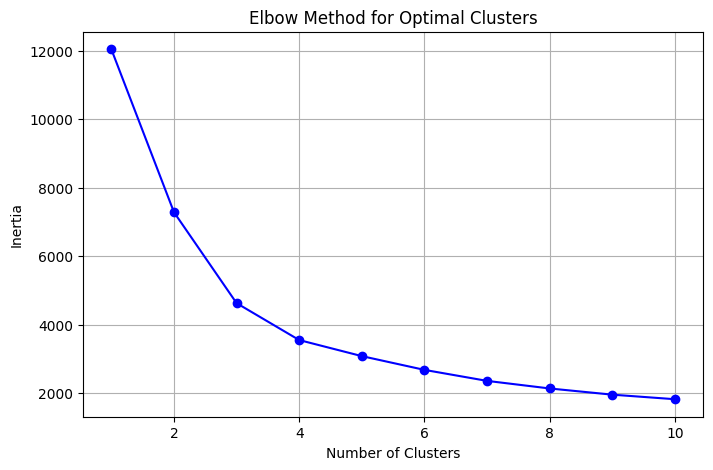

In [22]:
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.grid(True)
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled)
rfm["Clusters"] = (kmeans.labels_+1)

In [24]:
rfm

,Recency,Frequency,Monetary,Clusters
Customer,,,,
2,164,1,6.99,2
24,79,6,409.22,1
25,19,3,30.87,2
26,90,6,254.64,1
36,88,1,14.09,2
...,...,...,...,...
241088,2,1,10.19,2
241896,2,1,19.59,2
244665,1,1,56.69,2


In [25]:
rfm['Clusters'].unique()

array([2, 1, 3], dtype=int32)

In [26]:
group = rfm.groupby('Clusters')[['Recency', 'Frequency', 'Monetary']]
group.mean()

,Recency,Frequency,Monetary
Clusters,,,
1,66.547904,10.829341,338.081707
2,92.572511,2.298636,71.988075
3,268.951850,1.449794,49.653517


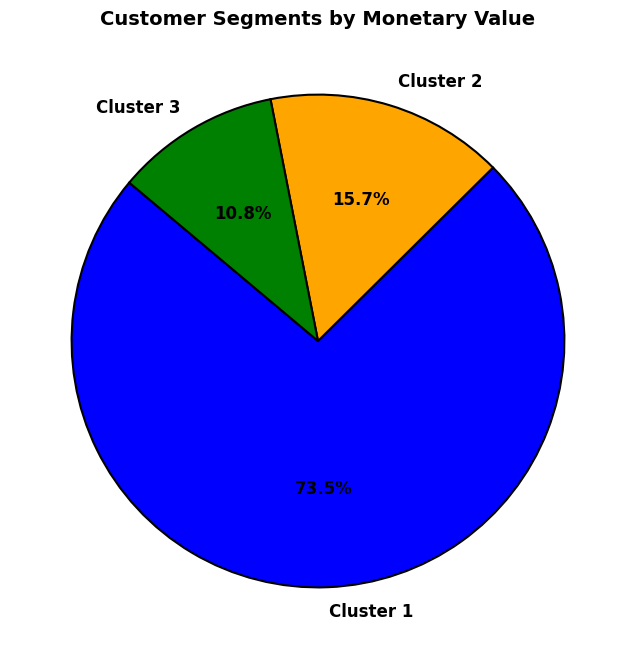

In [ ]:
import matplotlib.pyplot as plt


clusters = ['Cluster 1', 'Cluster 2', 'Cluster 3']
monetary_values = [338.08, 71.99, 49.65]  
colors = ['blue', 'orange', 'green']  

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    monetary_values, labels=clusters, autopct='%1.1f%%', 
    colors=colors, startangle=140, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
)

for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_fontweight('bold')


plt.title('Customer Segments by Monetary Value', fontsize=14, fontweight='bold')
plt.show()


In [30]:
rfm['Clusters'].value_counts()

Clusters
2    1979
3    1703
1     334
Name: count, dtype: int64

In [31]:
def func(row):
    if row['Clusters']==1:
        return '1'
    elif row['Clusters']==2:
        return '2'
    elif row['Clusters']==3:
        return '3'

rfm['Customer Segments'] = rfm.apply(func,axis=1)
rfm

,Recency,Frequency,Monetary,Clusters,Customer Segments
Customer,,,,,
2,164,1,6.99,2,2
24,79,6,409.22,1,1
25,19,3,30.87,2,2
26,90,6,254.64,1,1
36,88,1,14.09,2,2
...,...,...,...,...,...
241088,2,1,10.19,2,2
241896,2,1,19.59,2,2
244665,1,1,56.69,2,2


In [32]:
result = rfm['Customer Segments'].value_counts()
result


Customer Segments
2    1979
3    1703
1     334
Name: count, dtype: int64

C:\Users\utkso\AppData\Local\Temp\ipykernel_12084\976698843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=rfm['Customer Segments'], order=custom_order, palette="coolwarm", edgecolor="black")


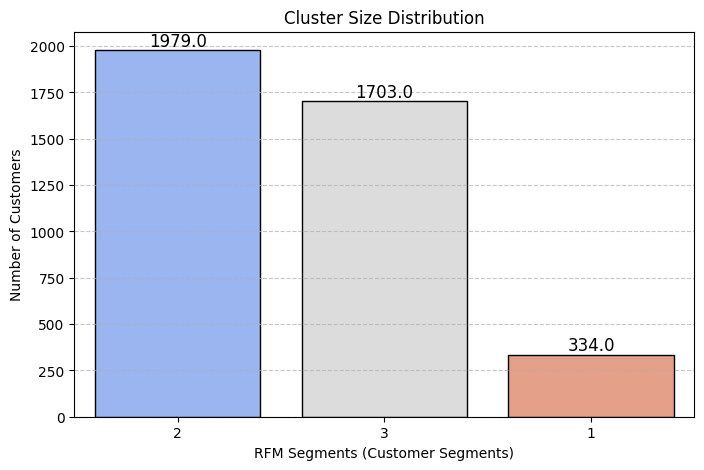

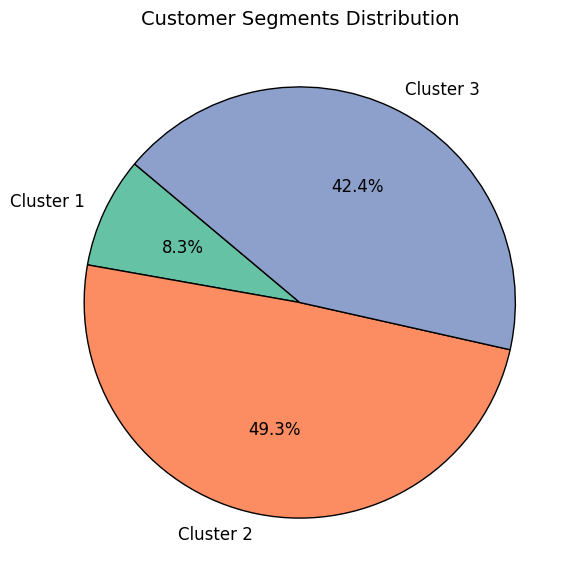

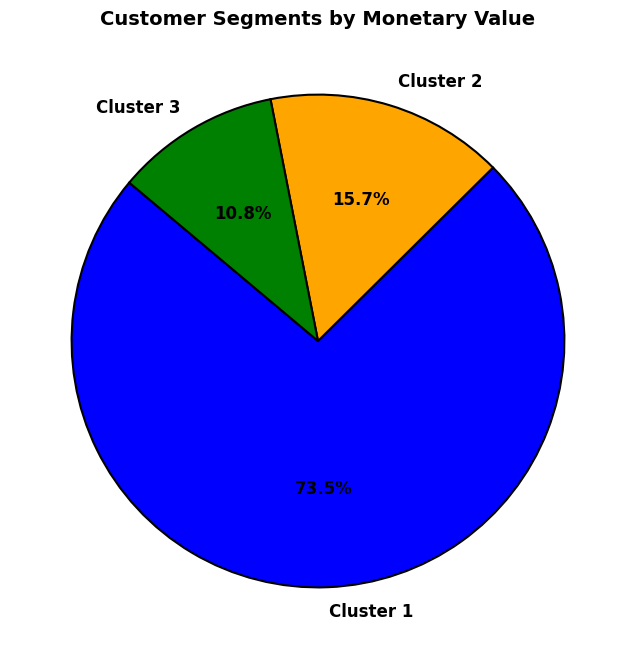

In [ ]:
custom_order = ['2', '3', '1']

plt.figure(figsize=(8, 5))
ax = sns.countplot(x=rfm['Customer Segments'], order=custom_order, palette="coolwarm", edgecolor="black")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel("RFM Segments (Customer Segments)")
plt.ylabel("Number of Customers")
plt.title("Cluster Size Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


segment_counts = rfm['Clusters'].value_counts().sort_index()


cluster_labels = [f"Cluster {int(i)}" for i in segment_counts.index]


colors = sns.color_palette("Set2")


plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(segment_counts, labels=cluster_labels, autopct='%1.1f%%', 
                                   colors=colors, wedgeprops={"edgecolor": "black"}, startangle=140)


for text in texts + autotexts:
    text.set_fontsize(12)
    text.set_color("black")


plt.title("Customer Segments Distribution", fontsize=14)
plt.show()



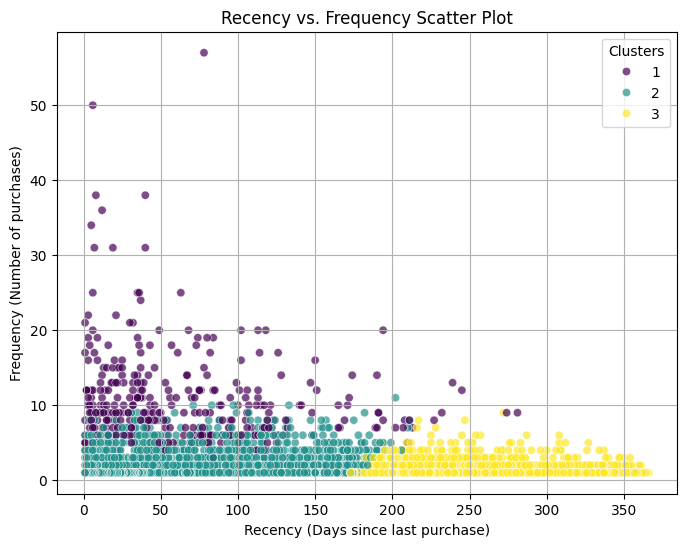

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm['Recency'], y=rfm['Frequency'], hue=rfm['Clusters'], palette='viridis', alpha=0.7)
plt.xlabel("Recency (Days since last purchase)")
plt.ylabel("Frequency (Number of purchases)")
plt.title("Recency vs. Frequency Scatter Plot")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

C:\Users\utkso\AppData\Local\Temp\ipykernel_14052\928538374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=rfm['Clusters'], y=rfm['Monetary'], palette='Set2')


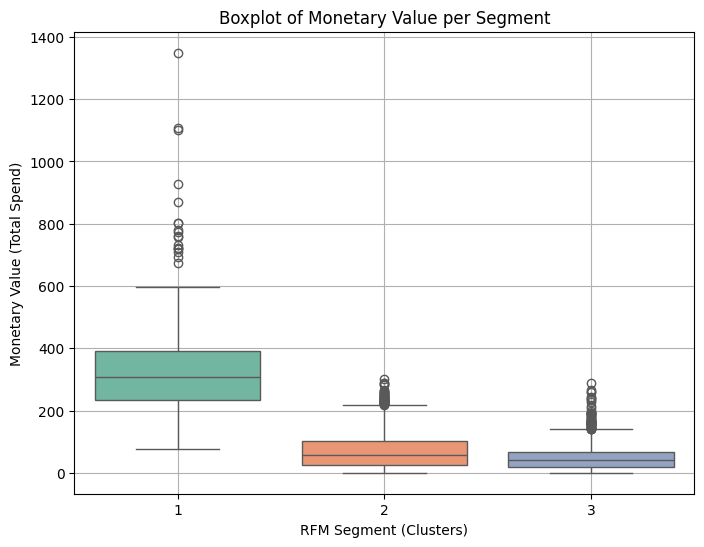

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rfm['Clusters'], y=rfm['Monetary'], palette='Set2')
plt.xlabel("RFM Segment (Clusters)")
plt.ylabel("Monetary Value (Total Spend)")
plt.title("Boxplot of Monetary Value per Segment")
plt.grid(True)
plt.show()


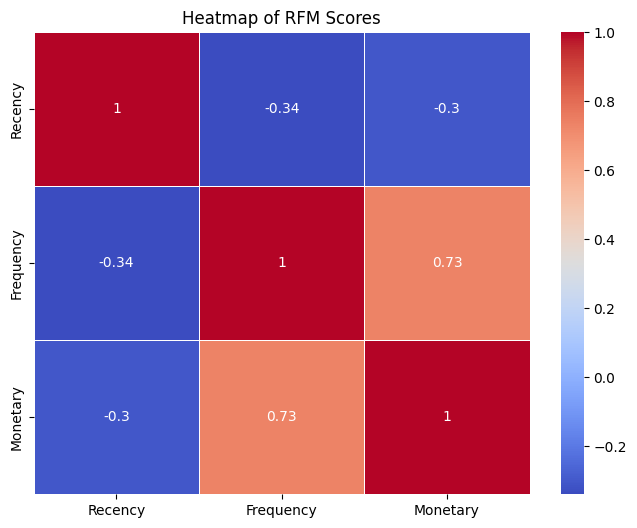

In [ ]:
rfm_heatmap = rfm[['Recency', 'Frequency', 'Monetary']]
rfm_heatmap = (rfm_heatmap - rfm_heatmap.min()) / (rfm_heatmap.max() - rfm_heatmap.min())  # Normalize

plt.figure(figsize=(8, 6))
sns.heatmap(rfm_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of RFM Scores")
plt.show()

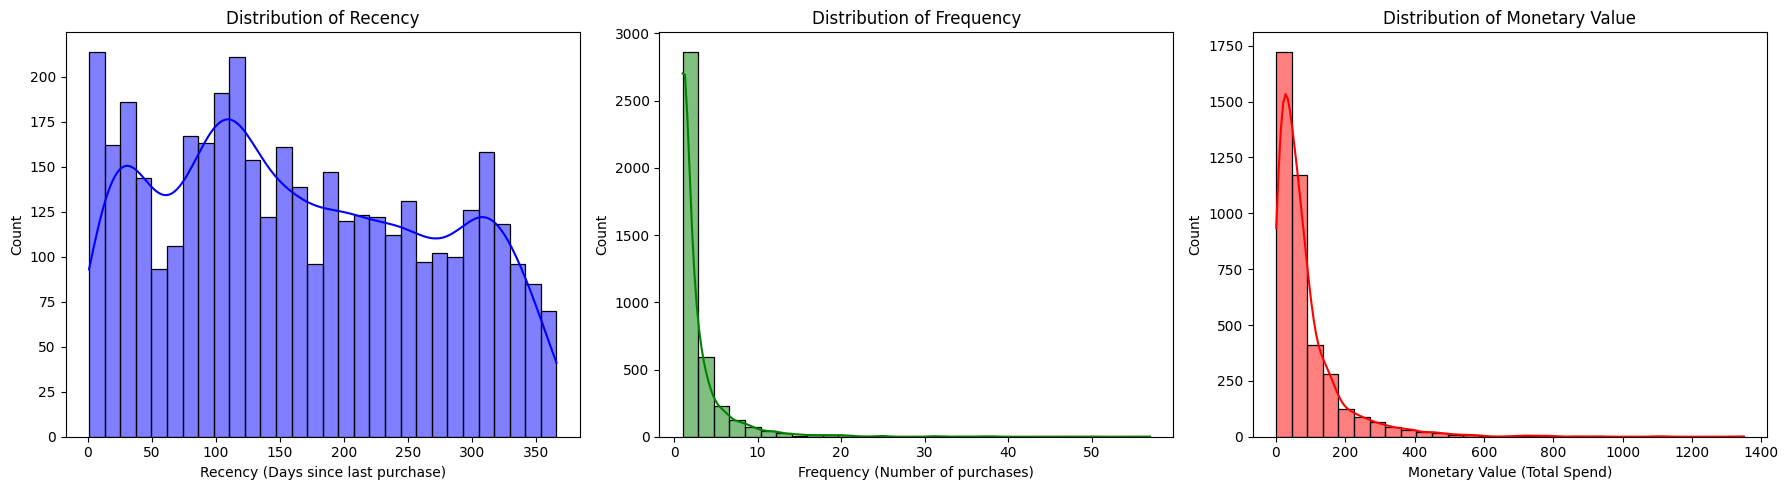

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm['Recency'], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Recency")
axes[0].set_xlabel("Recency (Days since last purchase)")

sns.histplot(rfm['Frequency'], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Frequency")
axes[1].set_xlabel("Frequency (Number of purchases)")

sns.histplot(rfm['Monetary'], bins=30, kde=True, ax=axes[2], color="red")
axes[2].set_title("Distribution of Monetary Value")
axes[2].set_xlabel("Monetary Value (Total Spend)")

plt.tight_layout()
plt.show()